In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [18]:
df = pd.read_csv('bankloans.csv')

In [19]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [20]:
df.isnull().sum()

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,450


In [21]:
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt   default
56   1   11      20       59      15.0     4.672800  4.177200  0.0        1
20   1   4       0        14      9.7      0.200984  1.157016  1.0        1
     3   0       1        17      2.3      0.043792  0.347208  0.0        1
21   1   1       1        16      6.3      0.141120  0.866880  0.0        1
                          18      17.3     0.158814  2.955186  0.0        1
                                                                         ..
22   1   4       3        14      17.5     0.225400  2.224600  0.0        1
                 2        24      15.6     1.636128  2.107872  1.0        1
                 1        16      1.2      0.084480  0.107520  0.0        1
         1       3        17      18.6     0.806310  2.355690  0.0        1
                 0        18      4.4      0.270072  0.521928  0.0        1
Name: count, Length: 700, dtype: int64

In [22]:
df = df.dropna()

In [23]:
df.isnull().sum()

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,0


<Axes: xlabel='age', ylabel='income'>

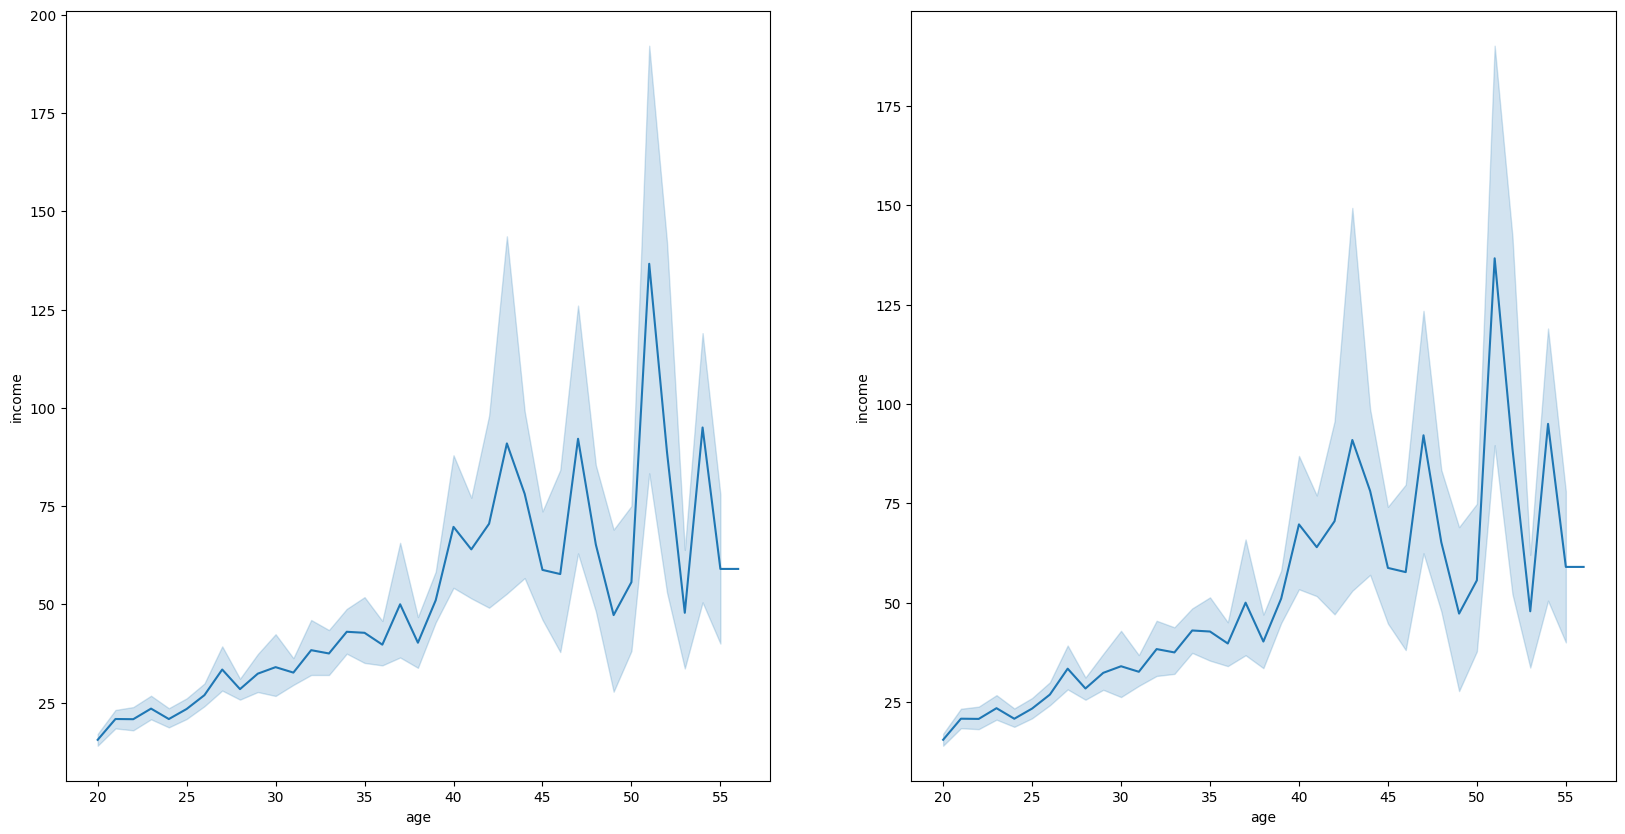

In [30]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.lineplot(x= 'age' , y = 'income' , data = df , ax = ax[0])
sns.lineplot(x= 'age' , y = 'income' , data = df , ax = ax[1])

<Axes: xlabel='age', ylabel='debtinc'>

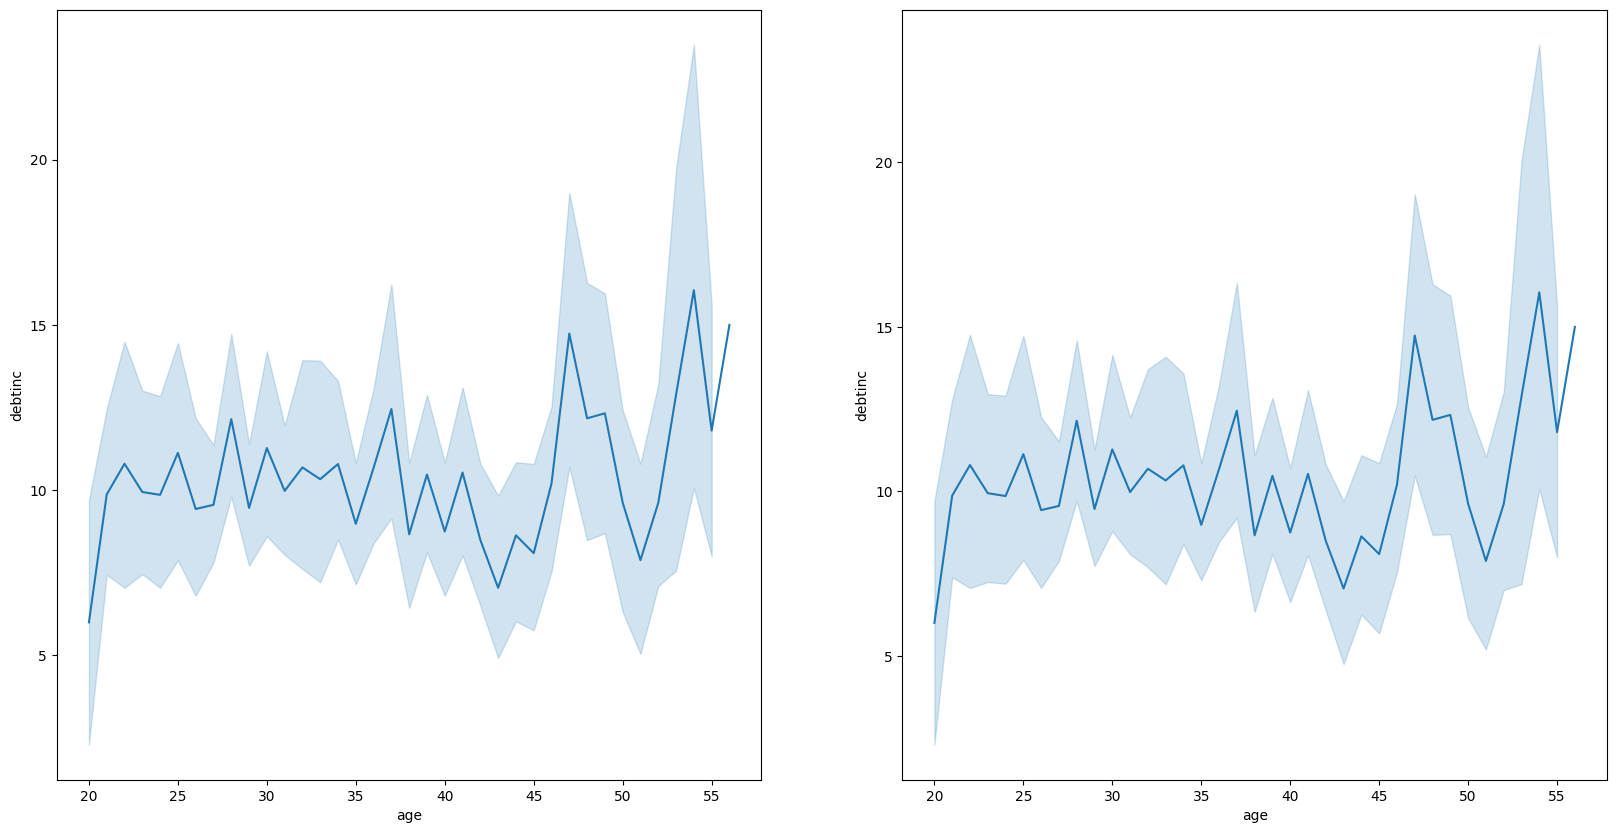

In [32]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.lineplot(x= 'age' , y = 'debtinc' , data = df , ax = ax[0])
sns.lineplot(x= 'age' , y = 'debtinc' , data = df , ax = ax[1])

In [33]:
df['default'].value_counts()

,count
default,
0.0,517
1.0,183


In [34]:
x = df.drop('default', axis = 1)
y = df['default']

In [35]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y, test_size = 0.2 , random_state = 42)

In [37]:
sc = StandardScaler()
x_train = sc.fit_transform(xtrain)
x_test = sc.transform(xtest)

In [38]:
##Creating Model

In [39]:
##Random Forest


In [46]:
rfc = RandomForestClassifier(n_estimators=350)
rfc.fit(x_train, ytrain)

RandomForestClassifier(n_estimators=350)

In [47]:
rfc.score(xtest, ytest)

0.6

In [48]:
rfc2 = cross_val_score(rfc, x_train, ytrain, cv=10)

In [50]:
rfc2.mean()

np.float64(0.7767857142857142)

In [51]:
##use Support Vector machine

In [53]:
sv = SVC()
sv.fit(x_train, ytrain)

SVC()

In [55]:
sv.score(xtest, ytest)

0.2714285714285714

In [56]:
model = GridSearchCV(sv,{'C':[0.1,0.2,0.4,0.8,1.2,1.8,4,7],
                     'gamma':[0.1,0.4,0.8,1.0,2,3],
                      'kernel':['rbf','linear']},cv=10)
model.fit(x_train, ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4, 7],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2, 3],
                         'kernel': ['rbf', 'linear']})

In [58]:
model.score(xtest, ytest)

0.7857142857142857

In [59]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [61]:
model2 = SVC(C=0.1, gamma=0.1, kernel='linear')
model2.fit(x_train, ytrain)
model2.score(xtest, ytest)

0.7857142857142857

In [63]:
lr = LogisticRegression()
model2.fit(x_train, ytrain)
model2.score(xtest, ytest)

0.7857142857142857

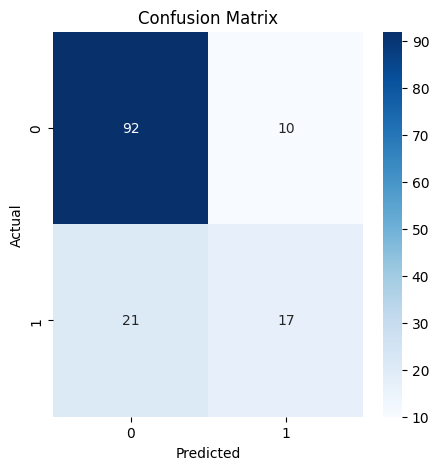

In [67]:
lr = LogisticRegression()
lr.fit(x_train, ytrain) # Fit the Logistic Regression model
yp = lr.predict(xtest)
c = confusion_matrix(ytest, yp)
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(c, annot=True, fmt='d', cmap='Blues', ax=ax) # Complete the heatmap call
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()